# Generaiton of test shapes

This notebook illustrates the ability of a simple CNN to count simple identical shapes (circles, sqaures or diamonds) from binary images as regression problem. The original code has been taken from https://github.com/rpmcruz/cnn-count and modified accordingly.

### Generation of images for training and testing

In [1]:
# Imports
from cnn_count import generate_shape_images as gen
from skimage.morphology import disk, diamond, square
import numpy as np
import matplotlib.pyplot as plt
from numpy import savez, load

In [2]:
# define constants
NIM = 60000
NIMDISPL = 12
NMIN, NMAX = 1, 3  # nbr of shapes
RMIN, RMAX = 2, 6  # shape radius
IMGSIZE = 64
OCCL = 0

SHAPES = [disk, diamond, square] 

In [3]:
# generate large training set of NIM images with the same type and same radius
shape_type_ind = 0
shape_radius = int((RMIN+RMAX)/2)
X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
Y = np.zeros(shape=(NIM), dtype = np.uint8)
for i in range(NIM):
    n = int(np.random.randint(NMIN, NMAX+1))
    shapes = [(shape_type_ind, shape_radius) for _ in range(n)]
    img = gen.generate_image(IMGSIZE, shapes, OCCL)
    X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
    Y[i]=n
print(np.shape(X))
print(np.shape(Y))


(60000, 64, 64, 1)
(60000,)


In [9]:
# save the generated data as NPZ file
savez("../Data/CountingShapes/circles_same_radius_60k.npz",images=X,labels=Y)

In [11]:
# load from NPZ file for testing
data = load("../Data/CountingShapes/circles_same_radius_60k.npz")
images=data['images']
labels=data['labels']
print(np.shape(images))
print(np.shape(labels))

(60000, 64, 64, 1)
(60000,)


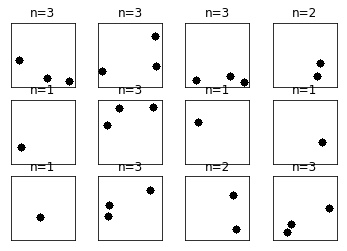

In [12]:
# plot random 12 of the generated NIM images
j=0
for _ in range(NIMDISPL):
    ind=int(np.random.randint(1,NIM))
    img=images[ind,:,:]
    img=np.reshape(img,(64,64))
    label=labels[ind]
    j = j+1
    plt.subplot(3, 4, j)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
   # plt.title('#%d' %(ind))
    plt.title('n=%d' %(label))
   

plt.show()

In [ ]:
# generate and display NIMDISPL test images with the same type and different radius
shape_type_ind = 1
shape_radius = int((RMIN+RMAX)/2)

for i in range(NIMDISPL):
    n = int(np.random.randint(NMIN, NMAX+1))
    shapes = [(shape_type_ind, np.random.randint(RMIN, RMAX)) for _ in range(n)]
    img = gen.generate_image(IMGSIZE, shapes, OCCL)
    
  #  X = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
    plt.subplot(3, 4, i+1)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.title('n=%d' %(n))

plt.show()

In [ ]:
# generate and display NIMDISPL test images with random type shapes and same radius
shape_radius = int((RMIN+RMAX)/2)
for i in range(NIMDISPL):
    n = int(np.random.randint(NMIN, NMAX+1)) # number of shapes
    
    shapes = [(np.random.randint(len(SHAPES)), shape_radius) for _ in range(n)]

    img = gen.generate_image(IMGSIZE, shapes,OCCL)
    plt.subplot(3, 4, i+1)
    plt.imshow(img, cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.title('n = %d' % n)

plt.show()

In [ ]:
# generate and display NIMDISPL test images with random type shapes and random radius
for i in range(NIMDISPL):
    n = int(np.random.randint(NMIN, NMAX+1)) # number of shapes
    
    shapes = [(np.random.randint(len(SHAPES)), np.random.randint(RMIN, RMAX)) for _ in range(n)]

    img = gen.generate_image(IMGSIZE, shapes,OCCL)
    plt.subplot(3, 4, i+1)
    plt.imshow(img, cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.title('n = %d' % n)

plt.show()
